In [1]:
import numpy as np 
import pandas as pd 
import collections
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
questions = pd.read_csv('Questions.csv',encoding='iso-8859-1')
questions.head(10)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [3]:
questions.drop(["OwnerUserId","CreationDate","ClosedDate","Score"], axis=1, inplace=True)
questions.head(10)

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,Automatically update version number,<p>I would like the version property of my app...
9,810,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [4]:
import re 

def rem_html_tags(body):
    regex = re.compile('<.*?>')
    return re.sub(regex, '', body)

In [5]:
questions['Body'] = questions['Body'].apply(rem_html_tags)
questions.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [6]:
questions.to_csv('question_clean.csv',index=False)

In [7]:
df_tags = pd.read_csv('Tags.csv', encoding='iso-8859-1')

In [8]:
df_tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [9]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar   
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


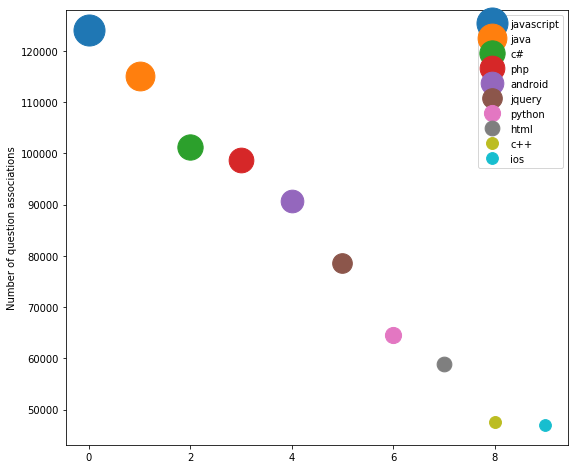

In [10]:
tagCount =  collections.Counter(list(df_tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [11]:
top10=['javascript','java','c#','php','android','jquery','python','html','c++','ios']

In [12]:
tag_top10= df_tags[df_tags.Tag.isin(top10)]
print (tag_top10.shape)
tag_top10.head()

(826739, 2)


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [13]:
tag_top10['Id'].value_counts().head(10)

30798790    5
31085960    5
11648170    5
35318730    5
4009250     5
30289880    5
23267320    5
35283570    5
30991580    5
23484760    5
Name: Id, dtype: int64

In [14]:
tag_top10.head()

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [15]:
def add_tags(question_id):
    return tag_top10[tag_top10['Id'] == question_id['Id']].Tag.values

top10 = tag_top10.apply(add_tags, axis=1)

In [16]:
len(top10),tag_top10.shape

(826739, (826739, 2))

In [17]:
tag_top10=pd.concat([tag_top10, top10.rename('Tags')], axis=1)
tag_top10.head()

,Id,Tag,Tags
14,260,c#,[c#]
18,330,c++,[c++]
28,650,c#,[c#]
35,930,c#,[c#]
39,1010,c#,[c#]


In [18]:
tag_top10.drop(["Tag"], axis=1, inplace=True)
tag_top10.shape

(826739, 2)

In [19]:
top10_tags=tag_top10.loc[tag_top10.astype(str).drop_duplicates().index]

In [20]:
ques = pd.read_csv('question_clean.csv', encoding='iso-8859-1')
ques.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [21]:
total=pd.merge(ques, top10_tags, on='Id')
print(total.shape)
total.head()

(706336, 4)


,Id,Title,Body,Tags
0,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,[c#]
1,330,Should I use nested classes in this case?,I am working on a collection of classes used f...,[c++]
2,650,Automatically update version number,I would like the version property of my applic...,[c#]
3,930,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,[c#]
4,1010,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,[c#]


In [23]:
pip install nltk

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
     |████████████████████████████████| 1.5 MB 317 kB/s eta 0:00:01
     |████████████████████████████████| 382 kB 14.6 MB/s eta 0:00:01
  Created wheel for regex: filename=regex-2022.1.18-cp35-cp35m-linux_x86_64.whl size=582164 sha256=c24c59ce30e2f166154a840cc1d609689dc3dc5550e6fd3cbf131e73242c3e71
  Stored in directory: /home/ccg/.cache/pip/wheels/1c/9b/21/c57057279bdb70127eaa91744f80b779935882db92ba12eae4
Successfully built regex
Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization, GRU ,concatenate
from keras.models import Model

Using TensorFlow backend.
/home/ccg/.virtualenvs/torch/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ccg/.virtualenvs/torch/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ccg/.virtualenvs/torch/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ccg/.virtualenvs/torch/lib/pytho

In [25]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(total.Tags)
labels = multilabel_binarizer.classes_
labels

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [26]:
train,test=train_test_split(total[:550000],test_size=0.25,random_state=24)

In [27]:
train.shape,test.shape

((412500, 4), (137500, 4))

In [28]:
X_train_t=train['Title']
X_train_b=train['Body']
y_train=multilabel_binarizer.transform(train['Tags'])
X_test_t=test['Title']
X_test_b=test['Body']
y_test=multilabel_binarizer.transform(test['Tags'])

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ccg/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
sent_lens_t=[]
for sent in train['Title']:
    sent_lens_t.append(len(word_tokenize(sent)))
max(sent_lens_t)

60

In [31]:
np.quantile(sent_lens_t,0.97)

18.0

In [32]:
max_len_t = 18
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_t)
sequences_train_t = tok.texts_to_sequences(X_train_t)

In [33]:
vocab_len_t=len(tok.index_word.keys())
vocab_len_t

68969

In [35]:
# from keras.utils import pad_sequences
from keras_preprocessing.sequence import pad_sequences

sequences_matrix_train_t = pad_sequences(sequences_train_t,maxlen=max_len_t)
sequences_matrix_train_t

array([[    0,     0,     0, ...,     1,   957,   197],
       [    0,     0,     0, ...,  9081,    45,   533],
       [    0,     0,     0, ...,   147,     8,   230],
       ...,
       [    0,     0,     0, ...,    10,    71,  2985],
       [    0,     0,     0, ...,     2,    18,    75],
       [    0,     0,     0, ..., 11009,   809,   267]], dtype=int32)

In [36]:
sequences_test_t = tok.texts_to_sequences(X_test_t)
sequences_matrix_test_t = pad_sequences(sequences_test_t,maxlen=max_len_t)

In [37]:
sequences_matrix_train_t.shape,sequences_matrix_test_t.shape,y_train.shape,y_test.shape

((412500, 18), (137500, 18), (412500, 10), (137500, 10))

In [38]:
sent_lens_b=[]
for sent in train['Body']:
    sent_lens_b.append(len(word_tokenize(sent)))
max(sent_lens_b)

20868

In [39]:
np.quantile(sent_lens_b,0.90)

578.0

In [40]:
max_len_b = 600
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_b)
sequences_train_b = tok.texts_to_sequences(X_train_b)

In [41]:
vocab_len_b =len(tok.index_word.keys())
vocab_len_b 

1292018

In [42]:
sequences_matrix_train_b = pad_sequences(sequences_train_b,maxlen=max_len_b)
sequences_matrix_train_b

array([[   0,    0,    0, ...,   51, 2082,   91],
       [   0,    0,    0, ..., 1408,  203,  825],
       [   0,    0,    0, ...,   34,   51,   83],
       ...,
       [   0,    0,    0, ...,   20,   68,  687],
       [   0,    0,    0, ...,  187,   58,   10],
       [   0,    0,    0, ...,  194,  197,   10]], dtype=int32)

In [43]:
sequences_test_b = tok.texts_to_sequences(X_test_b)
sequences_matrix_test_b = pad_sequences(sequences_test_b,maxlen=max_len_b)

In [44]:
sequences_matrix_train_t.shape,sequences_matrix_train_b.shape,y_train.shape

((412500, 18), (412500, 600), (412500, 10))

In [45]:
sequences_matrix_test_t.shape,sequences_matrix_test_b.shape,y_test.shape

((137500, 18), (137500, 600), (137500, 10))

In [46]:
def RNN():
 
    title_input = Input(name='title_input',shape=[max_len_t])
    title_Embed = Embedding(vocab_len_t+1,2000,input_length=max_len_t,mask_zero=True,name='title_Embed')(title_input)
    gru_out_t = GRU(300)(title_Embed)
  
    auxiliary_output = Dense(10, activation='sigmoid', name='aux_output')(gru_out_t)   
 
    body_input = Input(name='body_input',shape=[max_len_b]) 
    body_Embed = Embedding(vocab_len_b+1,170,input_length=max_len_b,mask_zero=True,name='body_Embed')(body_input)
    gru_out_b = GRU(200)(body_Embed)
  
    com = concatenate([gru_out_t, gru_out_b])
    
    dense1 = Dense(400,activation='relu')(com)
    dp1 = Dropout(0.5)(dense1)
    bn = BatchNormalization()(dp1) 
    dense2 = Dense(150,activation='relu')(bn)
    
    main_output = Dense(10, activation='sigmoid', name='main_output')(dense2)
    
    model = Model(inputs=[title_input, body_input],outputs=[main_output, auxiliary_output])
    return model

In [47]:
model = RNN()
model.summary()




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_input (InputLayer)        (None, 18)           0                                            
__________________________________________________________________________________________________
body_input (InputLayer)         (None, 600)          0                                            
__________________________________________________________________________________________________
title_Embed (Embedding)         (None, 18, 2000)     137940000   title_input[0][0]                
______________________________________________________________________________________________

In [48]:
model.compile(optimizer='adam',loss={'main_output': 'categorical_crossentropy', 'aux_output': 'categorical_crossentropy'},
              metrics=['accuracy'])

In [50]:
results=model.fit({'title_input': sequences_matrix_train_t, 'body_input': sequences_matrix_train_b},
          {'main_output': y_train, 'aux_output': y_train},
          validation_data=[{'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},
          {'main_output': y_test, 'aux_output': y_test}],
          epochs=3, batch_size=128)

Train on 412500 samples, validate on 137500 samples
Epoch 1/3
412500/412500 [==============================] - 15817s 38ms/step - loss: 2.0413 - main_output_loss: 0.8846 - aux_output_loss: 1.1567 - main_output_acc: 0.7761 - aux_output_acc: 0.6954 - val_loss: 1.6890 - val_main_output_loss: 0.6478 - val_aux_output_loss: 1.0412 - val_main_output_acc: 0.8442 - val_aux_output_acc: 0.7307
Epoch 2/3
412500/412500 [==============================] - 15827s 38ms/step - loss: 1.5182 - main_output_loss: 0.5941 - aux_output_loss: 0.9241 - main_output_acc: 0.8557 - aux_output_acc: 0.7621 - val_loss: 1.6767 - val_main_output_loss: 0.6250 - val_aux_output_loss: 1.0517 - val_main_output_acc: 0.8443 - val_aux_output_acc: 0.7287
Epoch 3/3
412500/412500 [==============================] - 15856s 38ms/step - loss: 1.3232 - main_output_loss: 0.4986 - aux_output_loss: 0.8246 - main_output_acc: 0.8749 - aux_output_acc: 0.7846 - val_loss: 1.7445 - val_main_output_loss: 0.6588 - val_aux_output_loss: 1.0856 - val

In [52]:
(predicted_main, predicted_aux)=model.predict({'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},verbose=1)

137500/137500 [==============================] - 525s 4ms/step


In [53]:
from sklearn.metrics import classification_report,f1_score

In [54]:
print(f1_score(y_test,predicted_main>.55,average='samples'))

0.8540977835497835


In [55]:
print(classification_report(y_test,predicted_main>.55))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     17054
           1       0.93      0.84      0.88     20681
           2       0.92      0.84      0.88      9700
           3       0.78      0.46      0.58     11304
           4       0.96      0.92      0.94      8897
           5       0.92      0.83      0.87     22472
           6       0.85      0.69      0.76     22938
           7       0.84      0.82      0.83     16150
           8       0.93      0.89      0.91     19659
           9       0.97      0.94      0.96     11576

   micro avg       0.91      0.82      0.86    160431
   macro avg       0.91      0.82      0.86    160431
weighted avg       0.91      0.82      0.86    160431
 samples avg       0.88      0.86      0.85    160431



/home/ccg/.virtualenvs/torch/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
test.iloc[24]

Id                                                16470700
Title    NetworkOnMainThreadException- Have tried makin...
Body     I've been trying to get this to work for a whi...
Tags                                       [java, android]
Name: 250148, dtype: object

In [57]:
predicted_main[24].round(decimals = 2)

array([1.  , 0.  , 0.  , 0.  , 0.  , 0.62, 0.  , 0.  , 0.  , 0.  ],
      dtype=float32)

In [58]:
labels

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [51]:
model.save('model.h5')